<a href="https://colab.research.google.com/github/MangoDingo33/ML/blob/main/%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
%mkdir '/content/drive/MyDrive/Colab Notebooks/titanic'
%cd '/content/drive/MyDrive/Colab Notebooks/titanic'
!unzip -qq '/content/drive/MyDrive/Colab Notebooks/titanic.zip'

mkdir: cannot create directory ‘/content/drive/MyDrive/Colab Notebooks/titanic’: File exists
/content/drive/MyDrive/Colab Notebooks/titanic
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [159]:
import pandas as pd
import numpy as np

In [160]:
#데이터 불러오기

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic/test.csv")
survived = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/titanic/gender_submission.csv")

In [161]:
#데이터 합치기

test = pd.merge(test, survived)

In [162]:
data = pd.concat([train, test])

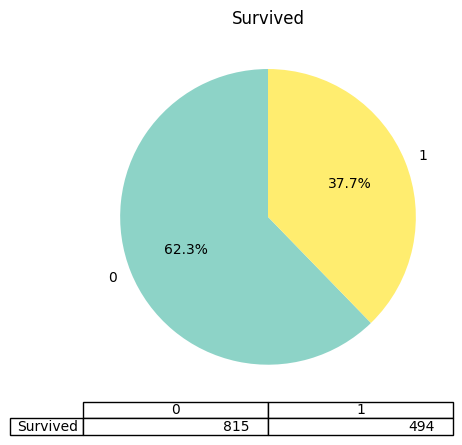

In [163]:
#타겟 시각화
from matplotlib import pyplot as plt

pie = data['Survived'].value_counts().plot.pie(autopct='%.1f%%',cmap='Set3', startangle=90,table=True)
pie.set_title('Survived')
pie.set_xlabel
pie.set_ylabel('')
plt.show()

In [164]:
#결측치 확인 및 열 확인

data.isna().sum()


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [165]:
#데이터 전처리
data['Age'].fillna(data['Age'].mean(), inplace=True) #나이 결측치를 평균으로 대체
data['Fare'].fillna(data['Fare'].mean(), inplace=True) #요금 결측치를 평균으로 대체
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) # 승선항구 결측치를 최빈값으로 대체

In [166]:
data.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [167]:
#성별 라벨인코딩으로 0,1로 만들기
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

data['Sex']=label.fit_transform(data['Sex'])


In [168]:
#승선항구 원핫인코딩(특성공학 이용)
data = pd.get_dummies(data, columns =['Embarked'])

In [169]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",1,29.881138,0,0,A.5. 3236,8.0500,NaN,0,0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,1,0,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0,1
416,1308,0,3,"Ware, Mr. Frederick",1,29.881138,0,0,359309,8.0500,NaN,0,0,1


In [170]:
#사용할 특성들만 챙기기
train = data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1).to_numpy()
test = data['Survived'].to_numpy()

In [171]:
#분할
student_num = 201835637

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(train, test, random_state = student_num)

In [184]:
#표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [185]:
#SGD분류
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=student_num)
sc.fit(train_input, train_target)

print('훈련: ', sc.score(train_scaled, train_target))
print('테스트: ', sc.score(test_scaled, test_target))

훈련:  0.8572884811416922
테스트:  0.8445121951219512


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


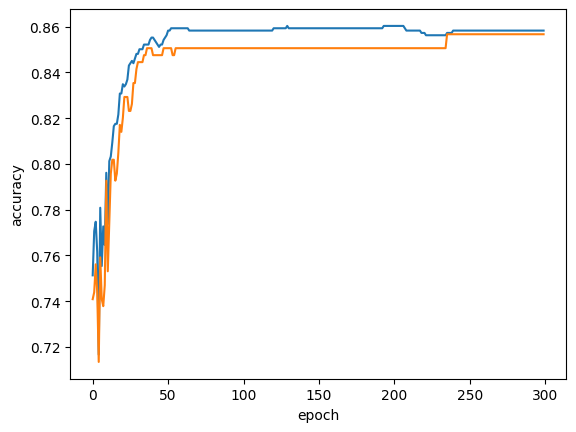

In [200]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=student_num)

train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [201]:
#에포크 50으로 수정
sc = SGDClassifier(loss='log_loss', max_iter=50, random_state=student_num)
sc.fit(train_scaled, train_target)

print('훈련: ', sc.score(train_scaled, train_target))
print('테스트: ', sc.score(test_scaled, test_target))

훈련:  0.8501529051987767
테스트:  0.8445121951219512


In [188]:
#결정트리
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=student_num)
dt.fit(train_scaled, train_target)

print('훈련: ', dt.score(train_scaled, train_target))
print('테스트: ', dt.score(test_scaled, test_target))

훈련:  0.9796126401630989
테스트:  0.7926829268292683


In [189]:
best_accuracy = 0
best_max_depth = 0

# 테스트할 max_depth 범위 설정 (1부터 10까지)
max_depth_range = range(1, 20)

for max_depth in max_depth_range:

    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=student_num)
    dt.fit(train_scaled, train_target)

    accuracy = dt.score(test_scaled, test_target)

    # 최고 정확도와 해당 max_depth 업데이트
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth

# 최고 정확도와 해당 max_depth 출력
print("가장 높은 정확도:", best_accuracy)
print("해당 max_depth:", best_max_depth)


가장 높은 정확도: 0.8567073170731707
해당 max_depth: 3


In [190]:
#깊이 3으로 수정
dt = DecisionTreeClassifier(max_depth=3, random_state=student_num)
dt.fit(train_scaled, train_target)

print('훈련: ', dt.score(train_scaled, train_target))
print('테스트: ', dt.score(test_scaled, test_target))

훈련:  0.8685015290519877
테스트:  0.8567073170731707


In [191]:
#랜덤 포레스트
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=student_num)
rf.fit(train_scaled, train_target)

print('훈련: ', rf.score(train_scaled, train_target))
print('테스트: ', rf.score(test_scaled, test_target))

훈련:  0.9796126401630989
테스트:  0.8475609756097561


In [192]:
#히스토그램기반 그래디언트 부스팅
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=student_num)
hgb.fit(train_scaled, train_target)

print('훈련: ', hgb.score(train_scaled, train_target))
print('테스트: ', hgb.score(test_scaled, test_target))

훈련:  0.9500509683995922
테스트:  0.8323170731707317


In [193]:
#XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=student_num)
xgb.fit(train_scaled, train_target)

print('훈련: ', xgb.score(train_scaled, train_target))
print('테스트: ', xgb.score(test_scaled, test_target))

훈련:  0.9643221202854231
테스트:  0.8292682926829268


In [194]:
#LightGBM
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=student_num)
lgb.fit(train_scaled, train_target)

print('훈련: ', lgb.score(train_scaled, train_target))
print('테스트: ', lgb.score(test_scaled, test_target))

[LightGBM] [Info] Number of positive: 362, number of negative: 619
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 253
[LightGBM] [Info] Number of data points in the train set: 981, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369011 -> initscore=-0.536461
[LightGBM] [Info] Start training from score -0.536461
훈련:  0.9551478083588175
테스트:  0.8292682926829268
